In [1]:
#!pip install astroML

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math as mt

In [3]:
from astroML.datasets import fetch_dr7_quasar

In [4]:
data = fetch_dr7_quasar()

In [5]:
data = data[:10000]

In [6]:
z = data['redshift']

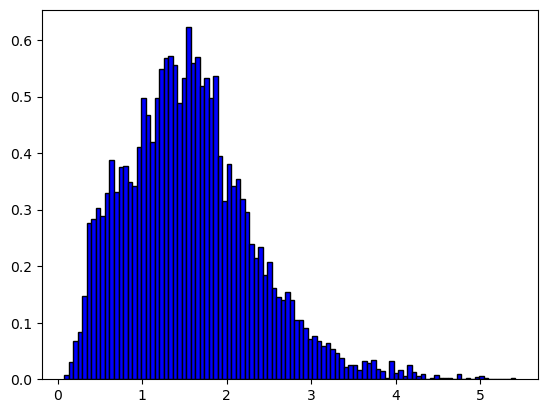

In [7]:
entries, raw_bin_edges, _ = plt.hist(z, bins=100, color='blue', edgecolor='black', label='data', density=True)

In [8]:
bin_edges = np.resize(raw_bin_edges, raw_bin_edges.size-1)

In [9]:
N = 10000
ymax = np.max(entries)
xmin = np.min(bin_edges)
xmax = np.max(bin_edges)
x = np.random.uniform(xmin,xmax,N)
y = np.random.uniform(0,ymax,N)

In [10]:
sel_z = []
for i in range(len(x)):
    for j in range(len(bin_edges)):
        if(x[i]>=bin_edges[j] and x[i]<bin_edges[j+1]):
            if(y[i]<=entries[j]): 
                sel_z.append(x[i])

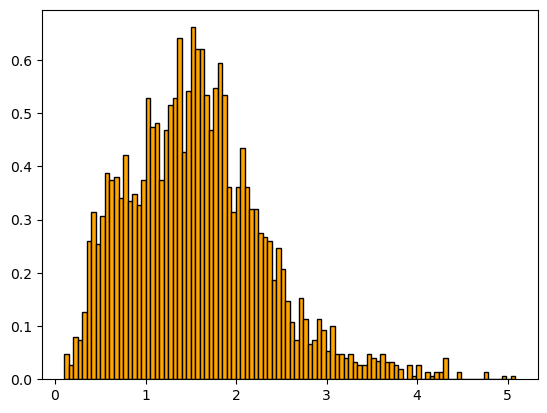

In [11]:
new_entries, new_bin_edges, _ = plt.hist(sel_z, bins=100, color='orange', edgecolor='black', label='data', density=True)

In [12]:
new_bin_edges = np.resize(new_bin_edges, new_bin_edges.size-1)

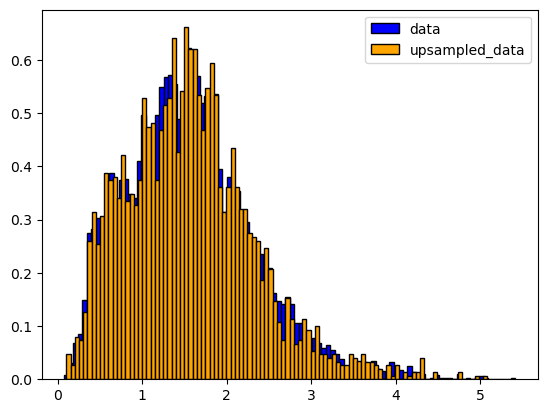

In [13]:
plt.hist(z, bins=100, color='blue', edgecolor='black', label='data', density=True)
plt.hist(sel_z, bins=100, color='orange', edgecolor='black', label='upsampled_data', density=True)
plt.legend()

In [17]:
from scipy.interpolate import interp1d
CDF = np.cumsum(entries)/np.sum(entries)
bin_centers = (raw_bin_edges[:-1] + raw_bin_edges[1:])/2
inverse_CDF = interp1d(CDF, bin_centers)
P = np.random.uniform(np.min(CDF), np.max(CDF), 10000)
z_inverse = inverse_CDF(P)

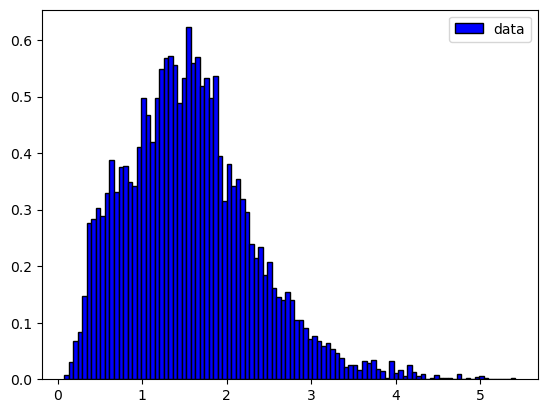

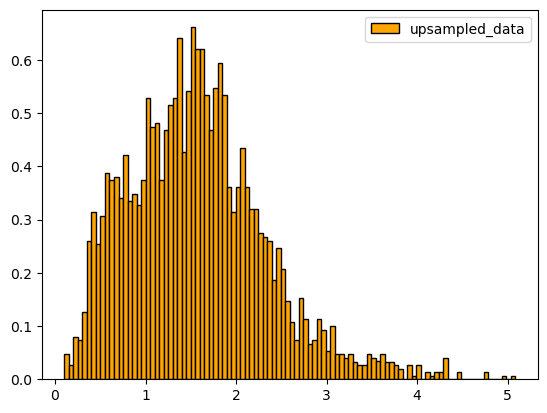

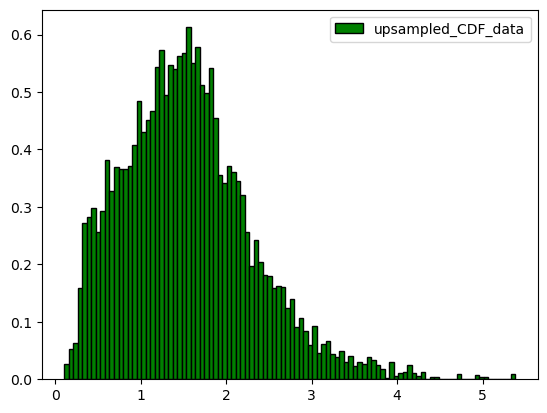

In [18]:
plt.hist(z, bins=100, color='blue', edgecolor='black', label='data', density=True)
plt.legend()
plt.show()
plt.close()
plt.hist(sel_z, bins=100, color='orange', edgecolor='black', label='upsampled_data', density=True)
plt.legend()
plt.show()
plt.close()
plt.hist(z_inverse, bins=100, color='green', edgecolor='black', label='upsampled_CDF_data', density=True)
plt.legend()
plt.show()
plt.close()